
<font color="#53ABD1
"><h1><b>Rolling Donut Wokshop</b></h1></font>

Welcome to the Rolling Donut Animation Workshop! In this notebook, we'll walk through a Python script that renders a 3D spinning donut using ASCII characters.

By the end of this workshop, you'll have:

* Understood the mathematics behind creating a 3D torus (donut shape)
* Learned how to implement 3D rotations and projections
* Created a basic lighting model for 3D rendering
* Implemented all of this in efficient Python code using NumPy
* Animated the donut to create a rolling effect

Before continuing with this tutorial, make sure numpy is installed on your computer
https://www.scaler.com/topics/numpy/install-numpy/

<font color ="DF3030
"><b>Important Disclaimer</b></font>

Please read carefully: The code in this notebook is designed to create an ASCII art animation of a rolling donut. However, due to limitations in how Google Colab renders output, you won't be able to see the animation directly in this notebook.
To properly view and interact with the animation:

* Copy the complete code provided in the final section of this notebook.
* Paste the code into a new file in Visual Studio Code (VSCode) or your preferred code editor.
* Run the code in your local terminal or command prompt.




# Setup

First, let's import the necessary libraries and set up our initial parameters.


In [ ]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt

screen_size = 40 # donut size
theta_spacing = 0.07
phi_spacing = 0.02
illumination = np.fromiter(".,-~:;=!*#$@", dtype="<U1") # ASCII letters to project the donut

A = 1  # Rotation angle around the X-axis
B = 1  # Rotation angle around the Z-axis
R1 = 1  # Distance from center to torus tube center
R2 = 2  # Radius of the torus tube

# Projection parameters
K2 = 5
K1 = screen_size * K2 * 3 / (8 * (R1 + R2))

<h1> Donut Rendering:

From Math to Code
Let's break down the mathematics behind our donut rendering and see how it translates into code.

# 1. Torus Geometry

A torus is created by rotating a circle around an axis. It can be described parametrically with two angles:

θ (theta): angle around the tube (0 to 2π)
φ (phi): angle around the axis of rotation (0 to 2π)

The parametric equations for a torus are:
\begin{align}
x &= \left(R2 + R1 \cos(θ)\right) \cos(φ) \\
y &= \left(R2 + R1 \cos(θ)\right) \sin(φ) \\
z &= R1 \sin(θ)
\end{align}

Where:

R1: radius of the tube

R2: distance from the center of the torus to the center of the tube

In [ ]:
# Generate angles
theta = np.arange(0, 2 * np.pi, theta_spacing)
phi = np.arange(0, 2 * np.pi, phi_spacing)

# Precompute sines and cosines
cos_theta, sin_theta = np.cos(theta), np.sin(theta)
cos_phi, sin_phi = np.cos(phi), np.sin(phi)

# Generate the circular cross-section of the torus
circle_x = R2 + R1 * cos_theta
circle_y = R1 * sin_theta

**Exercise 1: Experimenting with Torus Shape
Try changing the values of R1 and R2 to see how they affect the shape of the torus.**

Here's a simple visualization:

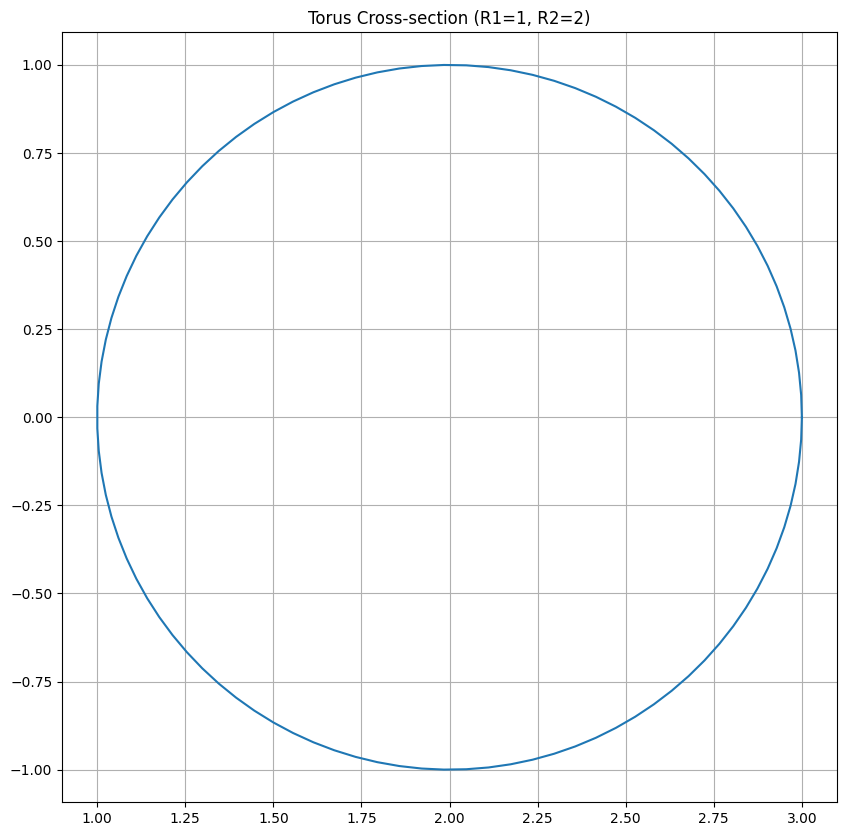

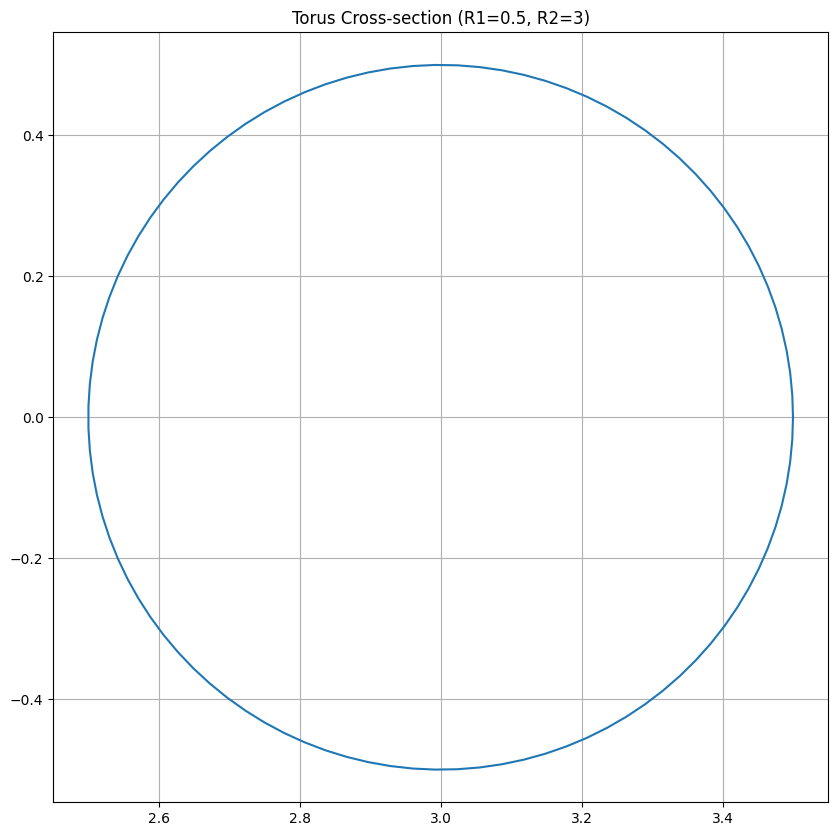

In [ ]:
def plot_torus_crosssection(R1, R2):
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = R2 + R1 * np.cos(theta)
    circle_y = R1 * np.sin(theta)

    plt.figure(figsize=(10, 10))
    plt.plot(circle_x, circle_y)
    plt.title(f"Torus Cross-section (R1={R1}, R2={R2})")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Original shape
plot_torus_crosssection(R1, R2)

# Try changing these values
new_R1 = 0.5
new_R2 = 3
plot_torus_crosssection(new_R1, new_R2)

# 2. 3D Rotation

We apply two rotations to our torus:

1. Rotation A around the X-axis:
$$
\begin{bmatrix}
1 &    0 &    0    \\
0 & \cos(A) & -\sin(A) \\
0 & \sin(A) &  \cos(A) \\
\end{bmatrix}
$$
2. Rotation B around the Z-axis:
$$
\begin{bmatrix}
\cos(B) & -\sin(B) & 0 \\
\sin(B) &  \cos(B) & 0 \\
      0 &       0  & 1 \\
\end{bmatrix}
$$

Combining these rotations with our torus equations gives us:
\begin{align}
x &= (R2 + R1 \cos θ) (\cos(B) \cos(φ) + \sin(A) \sin(B) \sin(φ)) - R1 \sin(θ) \cos(A) \sin(B) \\
y &= (R2 + R1 \cos θ) (\sin(B) \cos(φ) - \sin(A) \cos(B) \sin(φ)) + R1 \sin(θ) \cos(A) \cos(B) \\
z &= (R2 + R1 \cos θ) \cos(A) \sin(φ) + R1 \sin(θ) \sin(A)
\end{align}

In [ ]:
def calculate_3d_points(A, B):
    # Precompute rotation angles
    cos_A, sin_A = np.cos(A), np.sin(A)
    cos_B, sin_B = np.cos(B), np.sin(B)

    # Calculate 3D coordinates
    x = (np.outer(cos_B * cos_phi + sin_A * sin_B * sin_phi, circle_x) -
         circle_y * cos_A * sin_B).T
    y = (np.outer(sin_B * cos_phi - sin_A * cos_B * sin_phi, circle_x) +
         circle_y * cos_A * cos_B).T
    z = ((K2 + cos_A * np.outer(sin_phi, circle_x)) + circle_y * sin_A).T

    return x, y, z

Note: We use np.outer to efficiently compute these values for all combinations of θ and φ.


**Exercise 2: Visualizing 3D Rotation**

Let's visualize how the rotation affects the 3D points:

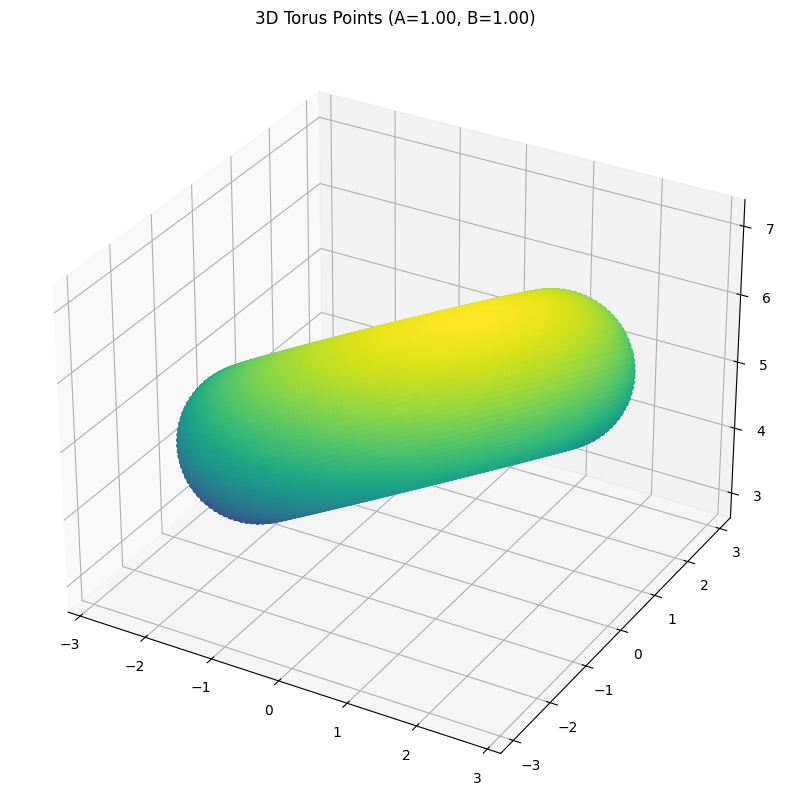

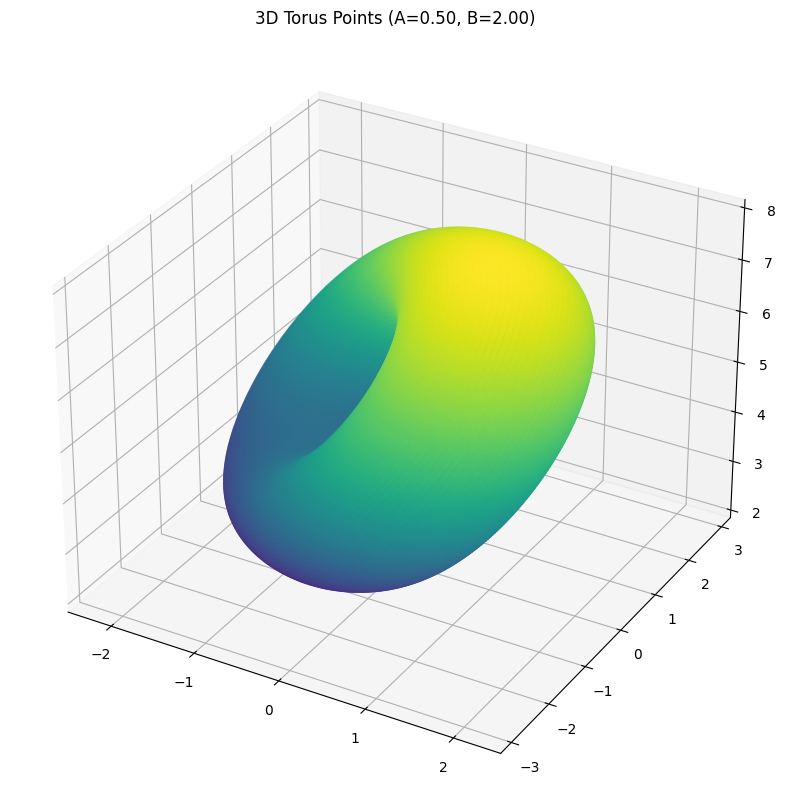

In [ ]:
def plot_3d_points(A, B):
    x, y, z = calculate_3d_points(A, B)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=z.flatten(), cmap='viridis')
    ax.set_title(f"3D Torus Points (A={A:.2f}, B={B:.2f})")
    plt.show()

# Original rotation
plot_3d_points(A, B)

# Try changing these angles
new_A = 0.5
new_B = 2.0
plot_3d_points(new_A, new_B)

# 3. Projection to 2D

We use a simple perspective projection. The idea is that objects farther away appear smaller:

x_projected = (x * distance) / z

y_projected = (y * distance) / z

We center this on our screen and scale it:

x_screen = screen_width/2 + K1 * x_projected

y_screen = screen_height/2 - K1 * y_projected

The negation for y_screen is because screen coordinates typically increase downwards.

In [ ]:
def project_2d(x, y, z):
    ooz = 1 / z  # "one over z"
    xp = (screen_size / 2 + K1 * ooz * x).astype(int)
    yp = (screen_size / 2 - K1 * ooz * y).astype(int)
    return xp, yp, ooz


**Exercise 3: Effect of Projection Distance**

Let's see how changing the projection distance (K1) affects the 2D projection:

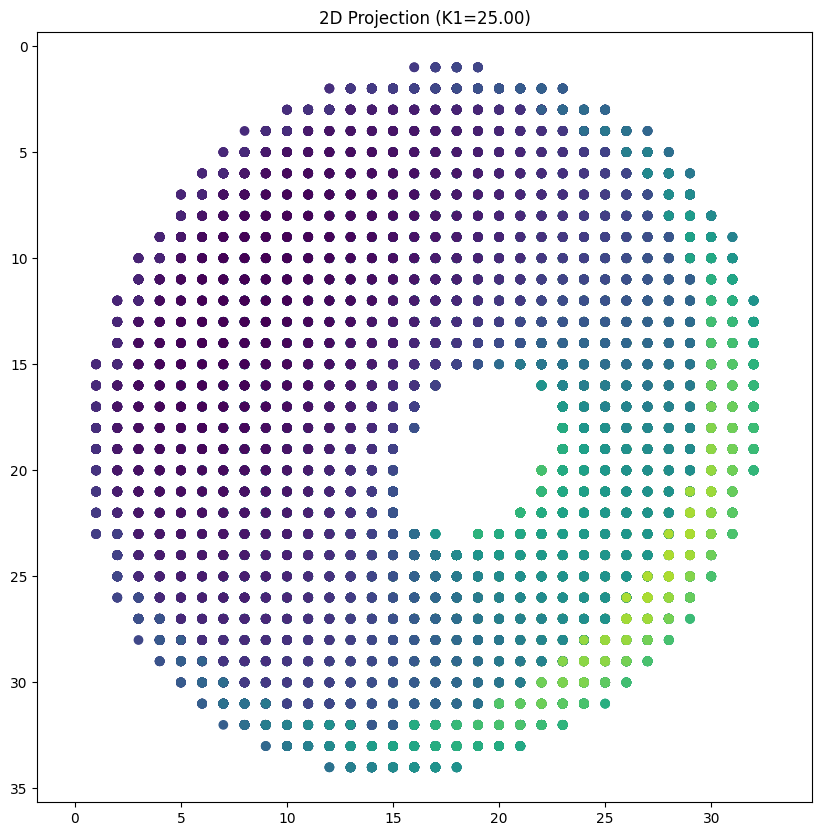

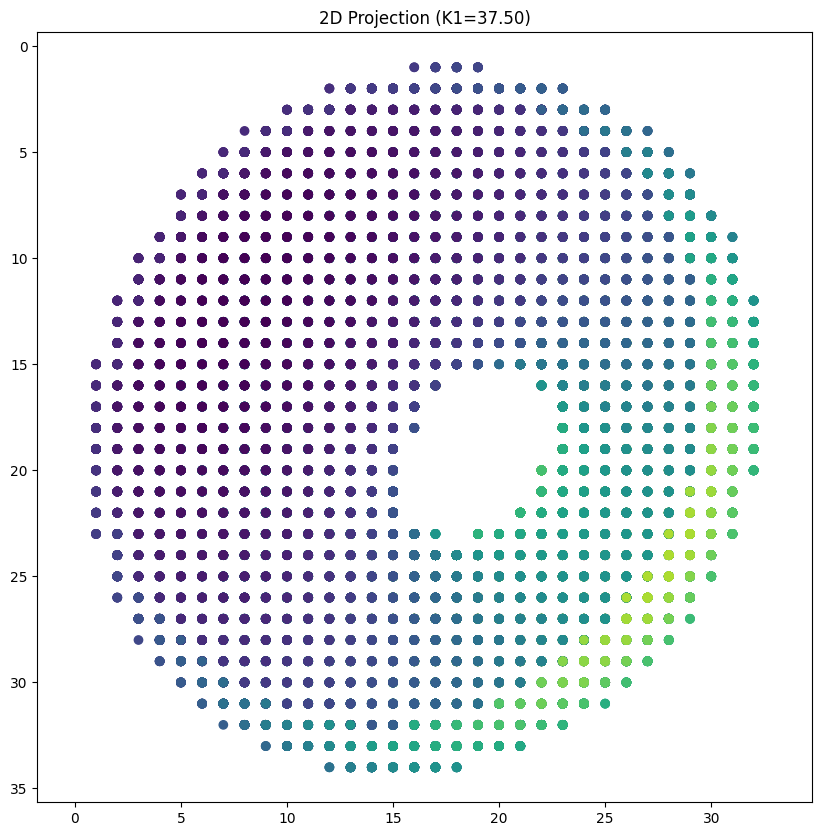

In [ ]:
def plot_2d_projection(K1):
    x, y, z = calculate_3d_points(A, B)
    xp, yp, _ = project_2d(x, y, z)

    plt.figure(figsize=(10, 10))
    plt.scatter(xp.flatten(), yp.flatten(), c=z.flatten(), cmap='viridis')
    plt.title(f"2D Projection (K1={K1:.2f})")
    plt.axis('equal')
    plt.gca().invert_yaxis()  # Invert y-axis to match screen coordinates
    plt.show()

# Original projection
plot_2d_projection(K1)

# Try changing this value
new_K1 = K1 * 1.5
plot_2d_projection(new_K1)

# 4. Lighting Calculation

We use a simple diffuse lighting model. The brightness of a point depends on how much its normal vector aligns with the light direction.

The surface normal N for a torus is:

Nx = cos(θ) * cos(φ)

Ny = cos(θ) * sin(φ)

Nz = sin(θ)

We then rotate this normal using our rotation matrices.

The lighting L is then calculated as the dot product of this rotated normal with our light direction vector (which we simplify to [0, 1, -1] after rotations).

In [ ]:
def calculate_lighting(A, B):
    cos_A, sin_A = np.cos(A), np.sin(A)
    cos_B, sin_B = np.cos(B), np.sin(B)

    L1 = (((np.outer(cos_phi, cos_theta) * sin_B) - cos_A * np.outer(sin_phi, cos_theta)) -
          sin_A * sin_theta)
    L2 = cos_B * (cos_A * sin_theta - np.outer(sin_phi, cos_theta * sin_A))
    L = np.around(((L1 + L2) * 8)).astype(int).T
    return L

**Exercise 4: Visualizing Lighting**

Let's visualize how the lighting affects the appearance of the torus:


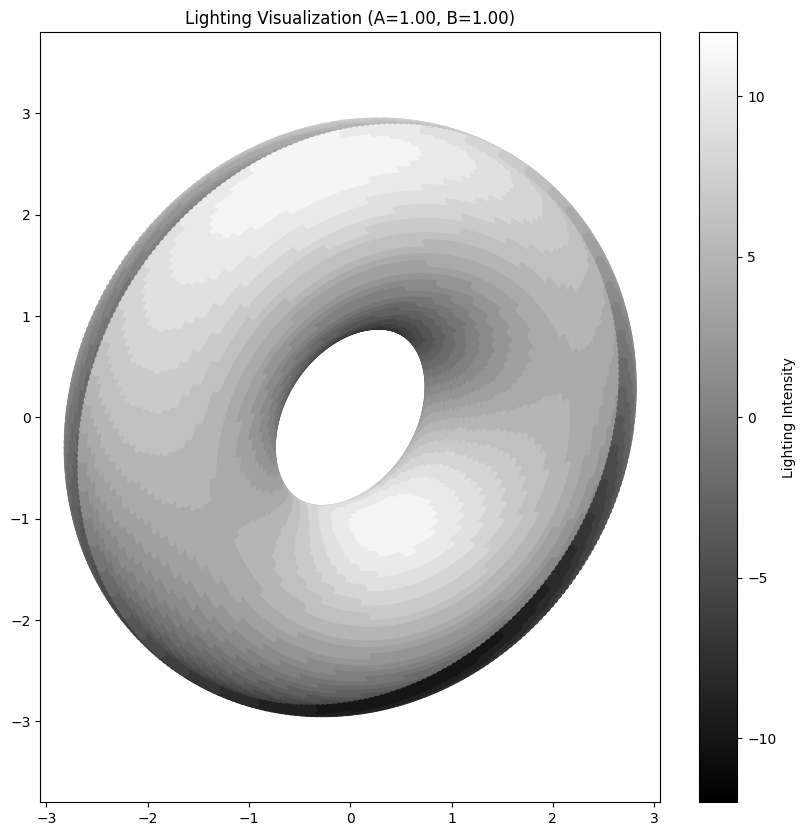

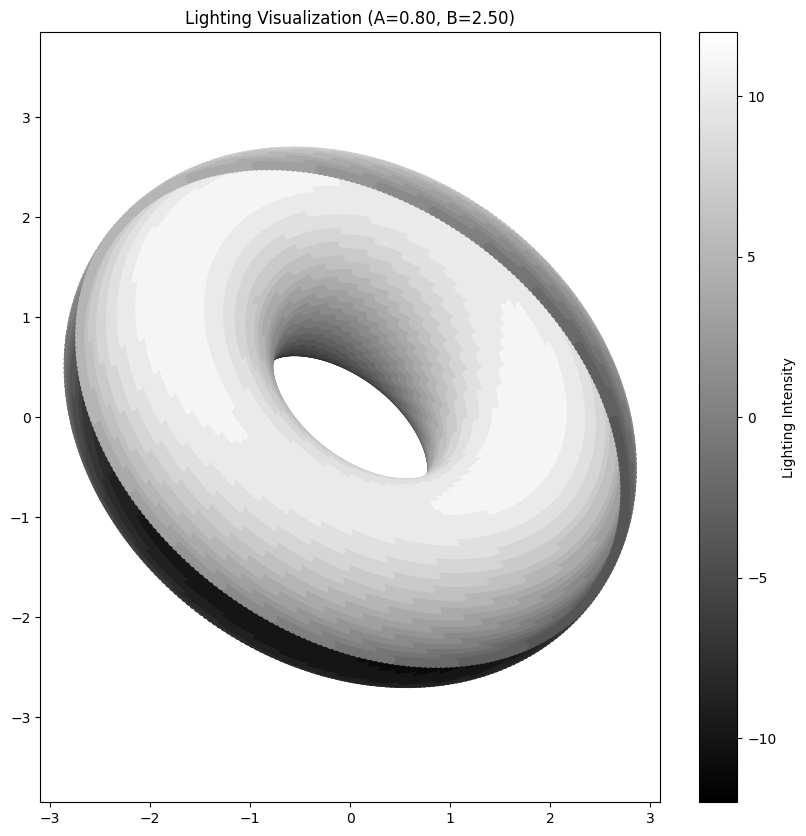

In [ ]:
def plot_lighting(A, B):
    L = calculate_lighting(A, B)
    x, y, _ = calculate_3d_points(A, B)

    plt.figure(figsize=(10, 10))
    plt.scatter(x.flatten(), y.flatten(), c=L.flatten(), cmap='gray', vmin=-12, vmax=12)
    plt.title(f"Lighting Visualization (A={A:.2f}, B={B:.2f})")
    plt.axis('equal')
    plt.colorbar(label='Lighting Intensity')
    plt.show()

# Original lighting
plot_lighting(A, B)

# Try changing these angles
new_A = 0.8
new_B = 2.5
plot_lighting(new_A, new_B)

# 5. Rendering

The final step is to determine which points are visible and how to shade them. We use a z-buffer algorithm:

For each projected (x, y) point, we keep only the point with the smallest z value (closest to the viewer).
We only draw points that are facing towards us (L > 0).
We map the L values to ASCII characters for shading.

In [ ]:
def render_frame(A: float, B: float) -> np.ndarray:
    x, y, z = calculate_3d_points(A, B)
    xp, yp, ooz = project_2d(x, y, z)
    L = calculate_lighting(A, B)

    output = np.full((screen_size, screen_size), " ")  # (40, 40)
    zbuffer = np.zeros((screen_size, screen_size))  # (40, 40)

    # Determine which points are illuminated
    mask_L = L >= 0
    chars = illumination[L]

    # Render the frame
    for i in range(90):
        mask = mask_L[i] & (ooz[i] > zbuffer[xp[i], yp[i]])
        zbuffer[xp[i], yp[i]] = np.where(mask, ooz[i], zbuffer[xp[i], yp[i]])
        output[xp[i], yp[i]] = np.where(mask, chars[i], output[xp[i], yp[i]])

    return output


This loop goes through each "slice" of our torus, updating the z-buffer and output array where appropriate.


**Let's test our render function:**

In [ ]:
def display_frame(frame):
    for row in frame:
        print("".join(row))

# Render and display a single frame
test_frame = render_frame(A, B)
display_frame(test_frame)

                                        
               !!!===;;:                
            ****!!!===;;;:-             
          *#****!!!!===;;::~,           
         ###****!!!!===;;;::~,          
       #$###***!!!!====;;;;::~,         
      $$$##***!!!!=====;;;;::~-,        
     $$$$##****!!=====;;;;;:::~-        
    $$$$##***!!!===;;;;;;;;:::~-,       
    @$$####*!!!===;;;;;;;;;:::~~,       
   @@$$#***!!===;;;::::::::::::~-,      
   @@$##***!==;;;:::~::::::::::~~,      
  @@$$##**!!=;;::~~~~~~~::::::::~-      
  @@$$##*!!=;;::~~-----~~::;;;::~-      
  @@$#**!!=;;:~--,,,,,--~:;;;;;:~-.     
  @@$#**!==;~~-,.    .,-~;;;=;;;:~.     
 @@$$##!!=;:~-,        ::;=====;:-.     
 @@$$#!!==:~-..        ==!!!!!=;:-.     
 @@$#**!=;~~,.          *****!==;-      
 @@$#*!==:~-.          #$$##**!=:-      
  @$#*!=;:~,.          $@@$$#*!=:,      
  @$#*!=;~~,.         #@@@@$#*!=~       
  @$#*!=;~-.        ;*$@@@@$#*!;-       
  @$#*!=;~-,      ,:=*#$@@$#**=:,       
   $#*!=::~,.   

# 6. Animation

Finally, let's animate our donut!


In [ ]:
def animate_donut(num_frames=100):
    A, B = 0, 0
    for _ in range(num_frames):
        A += 0.07
        B += 0.03
        frame = render_frame(A, B)
        clear_output(wait=True)
        display_frame(frame)
        sleep(0.1)

Congratulations! You've now created a 3D donut animation using nothing but ASCII characters.

Some ideas for further exploration:

1. Try changing the shape of the object (e.g., create a figure-eight or a knot)
2. Experiment with different lighting models
3. Add color to your ASCII art
4. Optimize the code further for even smoother animations

Remember, in order for the animation to render properly in the terminal, **please copy the full python code below into VSCode**

# Full Python Code:

In [ ]:
import numpy as np
from time import sleep

screen_size = 40
theta_spacing = 0.07
phi_spacing = 0.02
illumination = np.fromiter(".,-~:;=!*#$@", dtype="<U1")

A = 1
B = 1
R1 = 1
R2 = 2
K2 = 5
K1 = screen_size * K2 * 3 / (8 * (R1 + R2))


def render_frame(A: float, B: float) -> np.ndarray:
    """
    Returns a frame of the spinning 3D donut.
    Based on the pseudocode from: https://www.a1k0n.net/2011/07/20/donut-math.html
    """
    cos_A = np.cos(A)
    sin_A = np.sin(A)
    cos_B = np.cos(B)
    sin_B = np.sin(B)

    output = np.full((screen_size, screen_size), " ")  # (40, 40)
    zbuffer = np.zeros((screen_size, screen_size))  # (40, 40)

    cos_phi = np.cos(phi := np.arange(0, 2 * np.pi, phi_spacing))  # (315,)
    sin_phi = np.sin(phi)  # (315,)
    cos_theta = np.cos(theta := np.arange(0, 2 * np.pi, theta_spacing))  # (90,)
    sin_theta = np.sin(theta)  # (90,)
    circle_x = R2 + R1 * cos_theta  # (90,)
    circle_y = R1 * sin_theta  # (90,)

    x = (np.outer(cos_B * cos_phi + sin_A * sin_B * sin_phi, circle_x) - circle_y * cos_A * sin_B).T  # (90, 315)
    y = (np.outer(sin_B * cos_phi - sin_A * cos_B * sin_phi, circle_x) + circle_y * cos_A * cos_B).T  # (90, 315)
    z = ((K2 + cos_A * np.outer(sin_phi, circle_x)) + circle_y * sin_A).T  # (90, 315)
    ooz = np.reciprocal(z)  # Calculates 1/z
    xp = (screen_size / 2 + K1 * ooz * x).astype(int)  # (90, 315)
    yp = (screen_size / 2 - K1 * ooz * y).astype(int)  # (90, 315)
    L1 = (((np.outer(cos_phi, cos_theta) * sin_B) - cos_A * np.outer(sin_phi, cos_theta)) - sin_A * sin_theta)  # (315, 90)
    L2 = cos_B * (cos_A * sin_theta - np.outer(sin_phi, cos_theta * sin_A))  # (315, 90)
    L = np.around(((L1 + L2) * 8)).astype(int).T  # (90, 315)
    mask_L = L >= 0  # (90, 315)
    chars = illumination[L]  # (90, 315)

    for i in range(90):
        mask = mask_L[i] & (ooz[i] > zbuffer[xp[i], yp[i]])  # (315,)

        zbuffer[xp[i], yp[i]] = np.where(mask, ooz[i], zbuffer[xp[i], yp[i]])
        output[xp[i], yp[i]] = np.where(mask, chars[i], output[xp[i], yp[i]])

    return output


def pprint(array: np.ndarray) -> None:
    """Pretty print the frame."""
    print(*[" ".join(row) for row in array], sep="\n")


if __name__ == "__main__":
    for _ in range(screen_size * screen_size):
        A += theta_spacing
        B += phi_spacing
        print("\x1b[H")
        pprint(render_frame(A, B))
        sleep(0.05)


                                                                               
                              = = = = = ; ; :                                  
                        * * * * ! ! ! ! = = ; ; : ~                            
                    * # * * * * ! ! ! ! = = = ; ; : : ~                        
                  # # # # * * * ! ! ! ! = = = = ; ; : : ~ ,                    
                # # # # * * * ! ! ! ! ! = = = = ; ; ; : : ~ ,                  
            # $ $ # # # * * ! ! ! ! ! = = = = = ; ; ; ; : ~ - .                
          $ $ $ $ # # * * * * ! ! ! = = = = = = ; ; ; ; : : ~ -                
          $ $ $ # # # * * ! ! ! = = = = = ; ; ; ; ; ; ; : : ~ ~ ,              
        @ $ $ $ # * * * ! ! ! = = = ; ; ; ; ; ; ; ; ; ; ; : : ~ -              
        @ $ $ # # * * ! ! = = ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; : ~ - .            
      @ @ $ # # * * * ! = = ; ; : : : : : : : : ; ; ; ; ; ; : : ~ -            
      @ @ $ # # * * ! ! = ; : : : ~ ~ ~

KeyboardInterrupt: 